In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.svm import SVC
from imutils import face_utils
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
# Specify the directory and image file name
directory = "train/angry"
image_file = "Training_3908.jpg"  # Ensure the file extension is correct
image_path = os.path.join(directory, image_file)

# Check if the file exists
if os.path.exists(image_path):
    print(f"Image found at: {image_path}")
    # Open and display the image using PIL
    img = Image.open(image_path)
    img.show()  # Opens the image in the default image viewer
else:
    print(f"Image file not found: {image_path}")

Image found at: train/angry\Training_3908.jpg


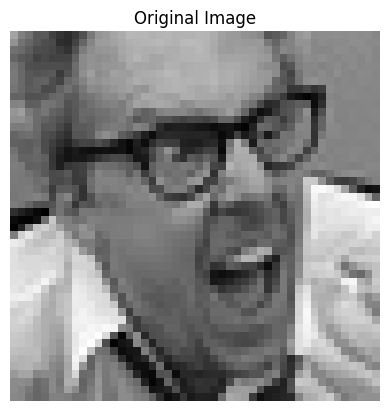

(48, 48, 3)


In [3]:
image = cv2.imread("train/angry/Training_3908.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")  
plt.title("Original Image")
plt.show()
print(image.shape)

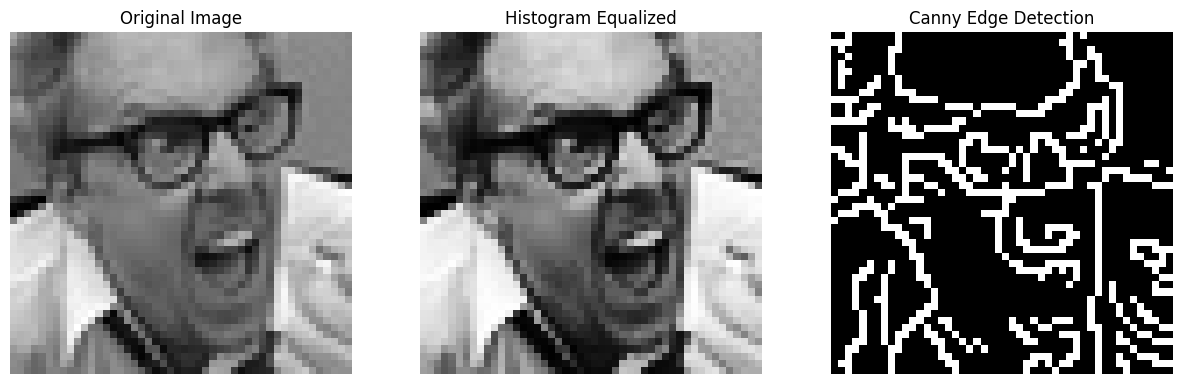

In [4]:

# Load Image
image = cv2.imread("train/angry/Training_3908.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization for contrast enhancement
equalized_image = cv2.equalizeHist(image)

# Apply Gaussian Blur for noise reduction
blurred_image = cv2.GaussianBlur(equalized_image, (3, 3), 0)

# Apply Edge Detection (Canny)
edges = cv2.Canny(blurred_image, 100, 200)

# Display Original and Processed Images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title("Histogram Equalized")
axes[1].axis("off")

axes[2].imshow(edges, cmap='gray')
axes[2].set_title("Canny Edge Detection")
axes[2].axis("off")

plt.show()


Image found at: train/angry\Training_3908.jpg


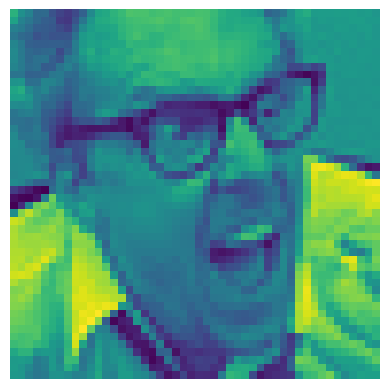

In [5]:
# Specify the directory and image file name
directory = "train/angry"
image_file = "Training_3908.jpg"  # Ensure the file extension is correct

# Construct the full path to the image
image_path = os.path.join(directory, image_file)

# Check if the file exists
if os.path.exists(image_path):
    print(f"Image found at: {image_path}")
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the image
else:
    print(f"Image file not found: {image_path}")

In [6]:
# Emotion Labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral' , 'Sad', 'Surprise']
num_classes = len(emotion_labels)

# Function to Load Images and Labels
def load_images_from_folder(base_path):
    X, y = [], []
    
    for emotion_index, emotion in enumerate(emotion_labels):
        folder_path = os.path.join(base_path, emotion.lower())  # e.g., "train/angry"
        
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            
            if image is not None:
                image = cv2.resize(image, (48, 48))  # Resize if necessary
                image = image / 255.0  # Normalize pixel values
                image = np.expand_dims(image, axis=-1)  # Reshape to (48, 48, 1)
                X.append(img_to_array(image))  # Convert to array
                y.append(emotion_index)  # Store corresponding label
    
    return np.array(X), np.array(y)

# Load Training & Testing Data
X_train, y_train = load_images_from_folder("train/")
X_test, y_test = load_images_from_folder("test/")

# Print Shapes
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

Training Data Shape: (28709, 48, 48, 1), Testing Data Shape: (7178, 48, 48, 1)


In [7]:
print("Before Fixing:")
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Before Fixing:
x_train shape: (28709, 48, 48, 1)
x_test shape: (7178, 48, 48, 1)
y_train shape: (28709,)
y_test shape: (7178,)


In [8]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=7)  # (28709, 7)
y_test = to_categorical(y_test, num_classes=7)  # (7178, 7)

print("Fixed y_train shape:", y_train.shape)  # (28709, 7)
print("Fixed y_test shape:", y_test.shape)  # (7178, 7)


Fixed y_train shape: (28709, 7)
Fixed y_test shape: (7178, 7)


In [9]:
def build_cnn_model():
    model = Sequential([
        # 1st Convolutional Block
        Conv2D(32, (3,3), activation='relu', input_shape=(48, 48, 1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # 2nd Convolutional Block
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # 3rd Convolutional Block (Optional)
        Conv2D(128, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),

        # Fully Connected Layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevents overfitting
        Dense(7, activation='softmax')  # 7 output classes (categorical)
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create CNN Model
emotion_model = build_cnn_model()

# Print Model Summary
emotion_model.summary()


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
# Train CNN Model
emotion_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - accuracy: 0.2679 - loss: 1.9585 - val_accuracy: 0.3218 - val_loss: 1.9120
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.3769 - loss: 1.5735 - val_accuracy: 0.4362 - val_loss: 1.4851
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.4416 - loss: 1.4440 - val_accuracy: 0.3455 - val_loss: 1.6527
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 131ms/step - accuracy: 0.4655 - loss: 1.3689 - val_accuracy: 0.4163 - val_loss: 1.4832
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.4968 - loss: 1.3004 - val_accuracy: 0.4873 - val_loss: 1.3494
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.5220 - loss: 1.2450 - val_accuracy: 0.4968 - val_loss: 1.2956
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 131ms/step - accuracy: 0.5439 - loss: 1.1788 - val_accuracy: 0.5251 - val_loss: 1.2352
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 61s 137ms/step - accuracy: 0.5713 - loss: 1

In [11]:
# Evaluate Model on Test Data
test_loss, test_acc = emotion_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5321 - loss: 1.6195
Test Accuracy: 0.5607


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 70s 155ms/step - accuracy: 0.7899 - loss: 0.5390 - val_accuracy: 0.5326 - val_loss: 1.6571
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 170ms/step - accuracy: 0.7926 - loss: 0.5317 - val_accuracy: 0.5697 - val_loss: 1.6874
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 195ms/step - accuracy: 0.8051 - loss: 0.4993 - val_accuracy: 0.5688 - val_loss: 1.6989
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 186ms/step - accuracy: 0.8179 - loss: 0.4750 - val_accuracy: 0.5638 - val_loss: 1.6604
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 189ms/step - accuracy: 0.8177 - loss: 0.4675 - val_accuracy: 0.5690 - val_loss: 1.7660
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 187ms/step - accuracy: 0.8253 - loss: 0.4437 - val_accuracy: 0.5690 - val_loss: 1.8461
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 144s 190ms/step - accuracy: 0.8256 - loss: 0.4441 - val_accuracy: 0.5651 - val_loss: 1.7757
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.8406 - loss: 

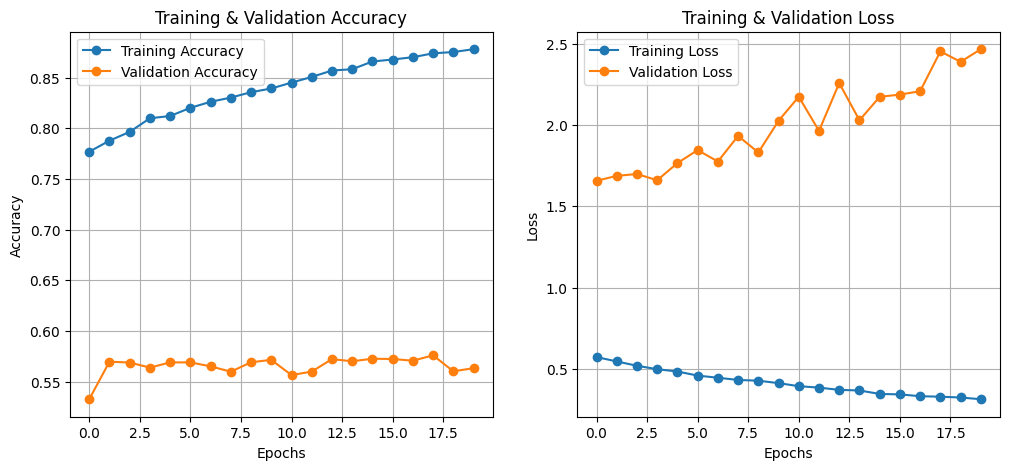

In [22]:
# Train the model and store the history
history = emotion_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


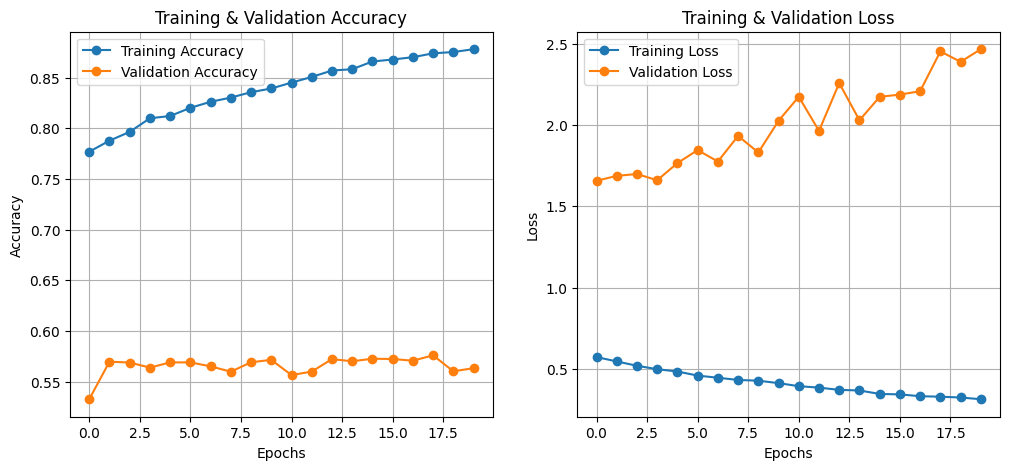

In [23]:
# Plot Accuracy Graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


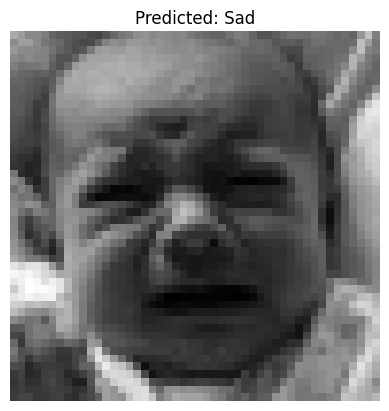

In [28]:
import random

def predict_emotion(index=None):
    if index is None:
        index = random.randint(0, len(X_test) - 1)

    test_image = np.expand_dims(X_test[index], axis=0)  # Add batch dimension
    prediction = emotion_model.predict(test_image)
    predicted_label = emotion_labels[np.argmax(prediction)]
    
    # Display Image & Prediction
    plt.imshow(X_test[index].reshape(48, 48), cmap='gray')
    plt.axis("off")
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

# Test on a random image
predict_emotion()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


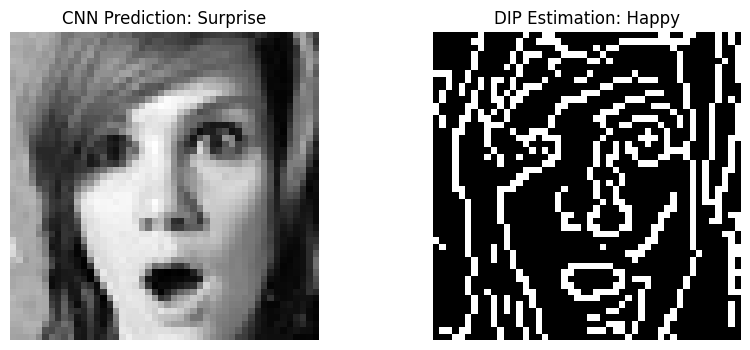

📌 CNN Model Predicted: Surprise
📌 DIP-Based Estimation: Happy


In [39]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

def dip_based_estimation(gray_img):
    """Estimate emotion using basic DIP techniques."""
    edges = cv2.Canny(gray_img, 50, 150)  # Apply Canny Edge Detection
    mean_intensity = np.mean(gray_img)  # Average brightness
    edge_count = np.sum(edges > 100)  # Count strong edges

    # Simple rule-based emotion classification
    if edge_count > 1500 and mean_intensity < 80:
        return "Angry"
    elif edge_count < 500 and mean_intensity > 150:
        return "Neutral"
    elif edge_count > 1800:
        return "Surprise"
    elif mean_intensity < 50:
        return "Sad"
    else:
        return "Happy"

def predict_emotion(index=None):
    """Predict emotion using CNN and compare with DIP-based estimation."""
    if index is None:
        index = random.randint(0, len(X_test) - 1)

    test_image = np.expand_dims(X_test[index], axis=0)  # Add batch dimension
    prediction = emotion_model.predict(test_image)
    cnn_predicted_label = emotion_labels[np.argmax(prediction)]

    # Convert image to grayscale for DIP processing
    gray_img = X_test[index].reshape(48, 48) * 255  # Convert back to 8-bit range
    dip_predicted_label = dip_based_estimation(gray_img.astype(np.uint8))

    # Display results
    plt.figure(figsize=(10, 4))

    # CNN Prediction
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.axis("off")
    plt.title(f"CNN Prediction: {cnn_predicted_label}")

    # DIP Prediction
    edges = cv2.Canny(gray_img.astype(np.uint8), 50, 150)
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.axis("off")
    plt.title(f"DIP Estimation: {dip_predicted_label}")

    plt.show()

    # Print comparison
    print(f"📌 CNN Model Predicted: {cnn_predicted_label}")
    print(f"📌 DIP-Based Estimation: {dip_predicted_label}")

# Run on a random image
predict_emotion()
